In [1]:
import pandas as pd
housing_df=pd.read_csv('housing.csv')

In [2]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [6]:

numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [7]:
housing_df=housing_df[numerical_cols]

In [8]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [10]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,65,60,NaN,9375,7,5,1997,1998,573.0,739,...,645,576,36,0,0,0,0,0,2,2009
682,683,120,NaN,2887,6,5,1996,1997,0.0,1003,...,431,307,0,0,0,0,0,0,11,2008
960,961,20,50.0,7207,5,7,1958,2008,0.0,696,...,0,117,0,0,0,0,0,0,2,2010
1384,1385,50,60.0,9060,6,5,1939,1950,0.0,204,...,280,0,0,0,0,0,0,0,10,2009
1100,1101,30,60.0,8400,2,5,1920,1950,0.0,290,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,82.0,9430,8,5,1999,1999,673.0,1163,...,856,0,128,0,0,180,0,0,7,2009
835,836,20,60.0,9600,4,7,1950,1995,0.0,442,...,436,290,0,0,0,0,0,0,2,2010
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0,...,539,0,0,0,0,0,0,0,4,2010
559,560,120,NaN,3196,7,5,2003,2004,18.0,0,...,420,143,20,0,0,0,0,0,10,2006


In [11]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [12]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.        , 0.24661955, 0.21213262, 0.16809474, 0.53891735,
       0.09656869, 0.35586043, 0.23982456, 0.09562471, 0.15452946,
       0.        , 0.11215997, 0.38361265, 0.31143673, 0.22128945,
       0.        , 0.48196865, 0.02130321, 0.00099254, 0.2561277 ,
       0.06582612, 0.06060667, 0.0356997 , 0.19574193, 0.18617664,
       0.26398198, 0.39000719, 0.36887304, 0.07560807, 0.17276748,
       0.01125708, 0.00677673, 0.02377391, 0.00714389, 0.0007728 ,
       0.        , 0.01460042])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.538917
GrLivArea        0.481969
GarageCars       0.390007
TotalBsmtSF      0.383613
GarageArea       0.368873
YearBuilt        0.355860
1stFlrSF         0.311437
GarageYrBlt      0.263982
FullBath         0.256128
MSSubClass       0.246620
YearRemodAdd     0.239825
2ndFlrSF         0.221289
LotFrontage      0.212133
TotRmsAbvGrd     0.195742
Fireplaces       0.186177
OpenPorchSF      0.172767
LotArea          0.168095
BsmtFinSF1       0.154529
BsmtUnfSF        0.112160
OverallCond      0.096569
MasVnrArea       0.095625
WoodDeckSF       0.075608
HalfBath         0.065826
BedroomAbvGr     0.060607
KitchenAbvGr     0.035700
ScreenPorch      0.023774
BsmtFullBath     0.021303
YrSold           0.014600
EnclosedPorch    0.011257
PoolArea         0.007144
3SsnPorch        0.006777
BsmtHalfBath     0.000993
MiscVal          0.000773
LowQualFinSF     0.000000
BsmtFinSF2       0.000000
MoSold           0.000000
Id               0.000000
dtype: float64

<AxesSubplot:>

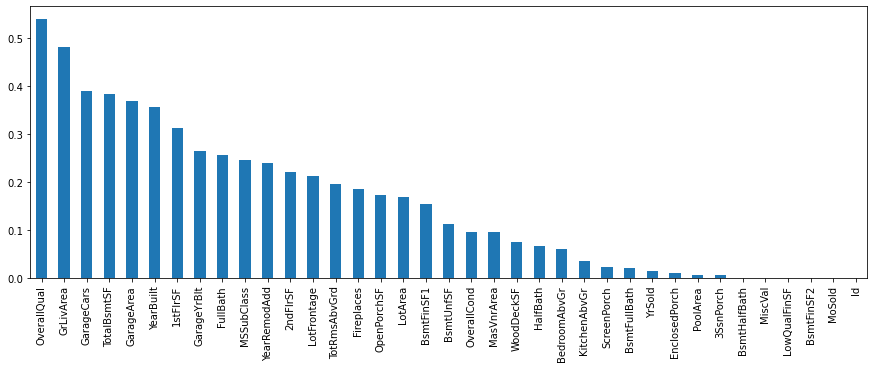

In [15]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [16]:
from sklearn.feature_selection import SelectPercentile

In [17]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000025D72F37670>)

In [18]:
selected_top_columns.get_support()

array([False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [19]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea'],
      dtype='object')